## Imports

In [2]:
import pandas as pd 
import requests
import seaborn as sns
from datetime import datetime

from helper import clean_data
from helper import RMSE
from helper import split_data

from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Data loading & cleaning

In [3]:
weekly_pct, vix_close = clean_data() #clean_data is a helper function that returns the data weekly and normalized
train_vix, train_prime, validation, validation_prime, test = split_data(weekly_pct)
train = train_vix #only using vix data in ARIMA models

In [4]:
model = ARIMA(train, order=(1,0,0)).fit()
preds = model.forecast(52*2)[0]
RMSE(validation,preds)


0.042172118418520976

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1301
Model:                     ARMA(1, 0)   Log Likelihood                2949.161
Method:                       css-mle   S.D. of innovations              0.025
Date:                Sat, 02 Feb 2019   AIC                          -5892.323
Time:                        11:51:43   BIC                          -5876.810
Sample:                             0   HQIC                         -5886.503
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      3.384      0.001       0.001       0.003
ar.L1.y       -0.1829      0.027     -6.699      0.000      -0.236      -0.129
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.4687           +0.0000j            5.4687            0.5000
-----------------------------------------------------------------------------
"""

In [6]:
def window_refitting_model(df,p,q):
    preds = []
    df = list(df)

    for i in validation:
        model = ARIMA(df, order=(p,0,q)).fit()
        pred = model.forecast()[0][0]
        preds.append(pred)
        df.append(i)

    plt.plot(validation)
    plt.plot(preds)
    rmse = RMSE(validation,np.array(preds))
    print(rmse)
    
    return rmse,validation,preds


0.041490175064605735


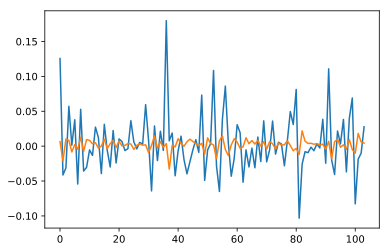

In [7]:
ans = window_refitting_model(train,1,0) 

In [ ]:
#testing p/q combos up to p=9, q=2 (this takes some time to run)
res= []
for p in range(1,10):
    for q in range(2):
        model = ARIMA(train, order=(p,0,q)).fit()
        preds = model.forecast(52*2)[0]
        score = RMSE(validation,preds)
        res.append([p,q,score])
        


In [45]:
for row in res:
    print ('p = {}, q= {}, RMSE = {}'.format(row[0],row[1],row[2]))

p = 1, q= 0, RMSE = 0.042172118418520976
p = 1, q= 1, RMSE = 0.04217618897626926
p = 1, q= 2, RMSE = 0.04219409214613685
p = 2, q= 0, RMSE = 0.04217483949589702
p = 2, q= 1, RMSE = 0.042182145298439146
p = 2, q= 2, RMSE = 0.042175081678248856
p = 3, q= 0, RMSE = 0.04217688711250547
p = 3, q= 1, RMSE = 0.04217337311578941
p = 3, q= 2, RMSE = 0.04219460364749266
p = 4, q= 0, RMSE = 0.04216860726389293
p = 4, q= 1, RMSE = 0.042170710512310416
p = 4, q= 2, RMSE = 0.042189263425340524
p = 5, q= 0, RMSE = 0.04215724501953618
p = 5, q= 1, RMSE = 0.042173959840923224
p = 5, q= 2, RMSE = 0.042200765810918396
p = 6, q= 0, RMSE = 0.04213200463653562
p = 6, q= 1, RMSE = 0.04216954695081294
p = 6, q= 2, RMSE = 0.04220367063003942
p = 7, q= 0, RMSE = 0.042077974769531346
p = 7, q= 1, RMSE = 0.042095858953725425
p = 7, q= 2, RMSE = 0.04206965601603319
p = 8, q= 0, RMSE = 0.04207700118551127
p = 8, q= 1, RMSE = 0.04208656351096934
p = 8, q= 2, RMSE = 0.04196769331818068
p = 9, q= 0, RMSE = 0.042108179

0.041170301888883994


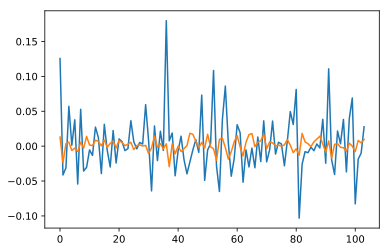

In [8]:
ans = window_refitting_model(train,8,2) #note: this will take some time (10 minutes on my machine)